In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/traffic.csv')
data.head(15)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [ ]:
data.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
The description about dataset:
            Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10


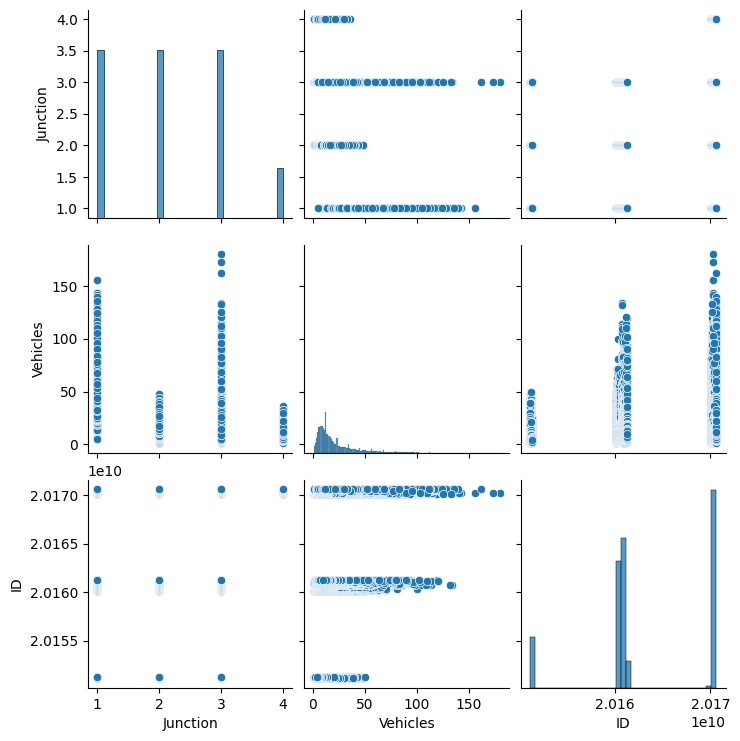

In [ ]:
print(data.info())
print('The description about dataset:\n',data.describe())

# Check for missing values
missing_values = data.isnull().sum()

# Visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()


          Junction  Vehicles        ID
Junction  1.000000 -0.613787  0.221876
Vehicles -0.613787  1.000000  0.227974
ID        0.221876  0.227974  1.000000


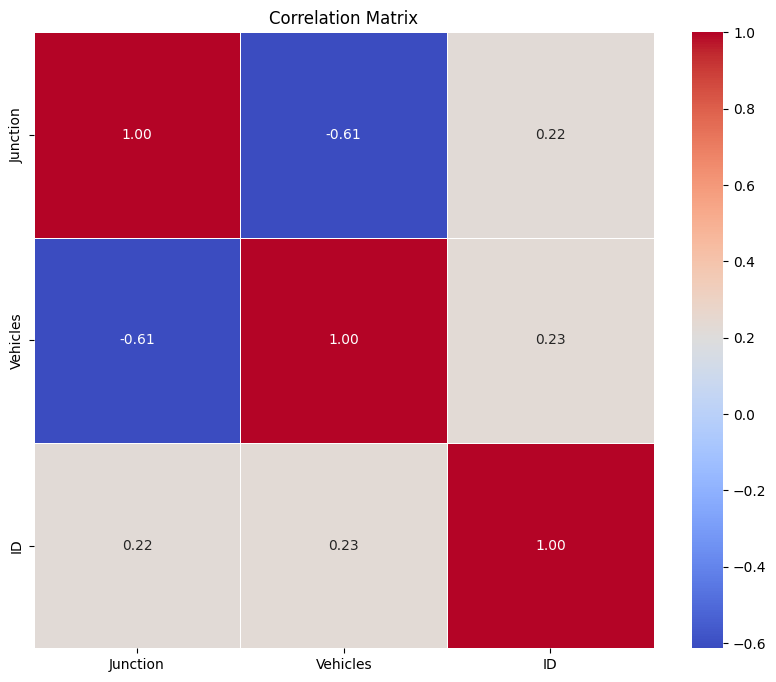

In [ ]:
# Exclude non-numeric columns before correlation analysis
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Split data into two groups based on Junction
junction1_data = data[data['Junction'] == 1]['Vehicles']
junction2_data = data[data['Junction'] == 2]['Vehicles']

# Perform t-test
t_statistic, p_value = ttest_ind(junction1_data, junction2_data)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 153.93470815373487
P-value: 0.0


R-squared: 0.5834783350948503
Adjusted R-squared: 0.5832184692334141
RMSE: 13.028892827572516
Intercept: -34509.21008370601
Coefficients: [-15.10953832  17.13523964   1.20130947   0.06933321   0.66166751
   0.        ]
Cross-validation scores: [ 0.37825689  0.38691501 -4.97708114 -2.71078304  0.23682643]
Mean CV Score: -1.337173171352862


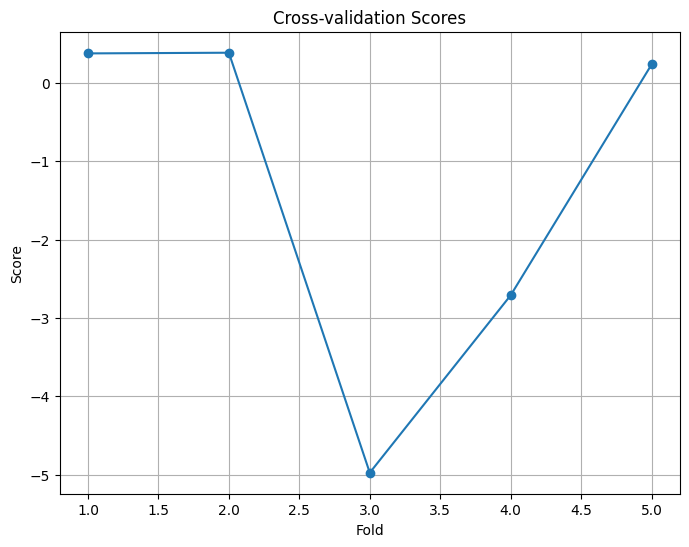

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract features from the 'DateTime' column
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute

# Assuming 'Junction' as a predictor variable
X = data[['Junction', 'Year', 'Month', 'Day', 'Hour', 'Minute']]
y = data['Vehicles']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = model.score(X_test, y_test)

# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Interpret Coefficients
coefficients = model.coef_
intercept = model.intercept_

print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)
print("RMSE:", rmse)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

import matplotlib.pyplot as plt

# Plotting cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()


Ridge Regression RMSE: 13.028848521127232
Ridge Regression Cross-validation scores: [ 0.37822716  0.38687015 -4.97655342 -2.70966332  0.23684346]
Ridge Regression Mean CV Score: -1.336855196614455


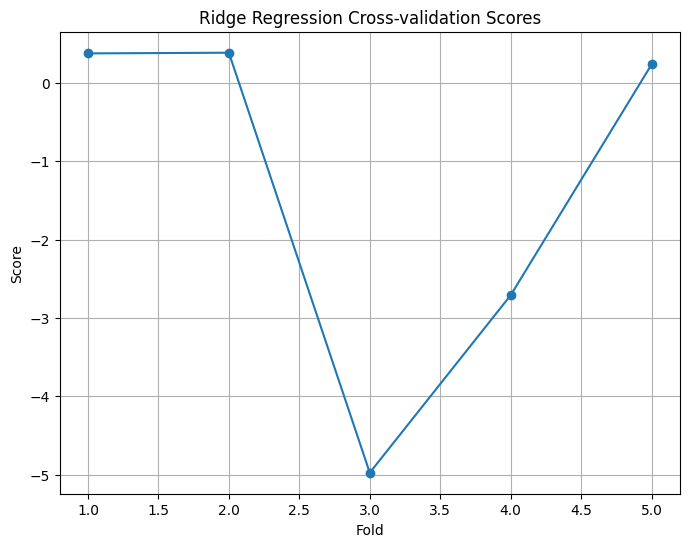

In [ ]:
from sklearn.linear_model import Ridge

# Initialize and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate model performance
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Ridge Regression RMSE:", rmse_ridge)

# Perform cross-validation for Ridge Regression
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5)
print("Ridge Regression Cross-validation scores:", cv_scores_ridge)
print("Ridge Regression Mean CV Score:", cv_scores_ridge.mean())

import matplotlib.pyplot as plt

# Plotting cross-validation scores for Ridge Regression
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores_ridge) + 1), cv_scores_ridge, marker='o', linestyle='-')
plt.title('Ridge Regression Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()


Random Forest Regression RMSE: 4.284750500995038
Random Forest Regression Cross-validation scores: [-2.13554167  0.3132829  -0.26812368 -0.29300428 -0.8599032 ]
Random Forest Regression Mean CV Score: -0.6486579865242325


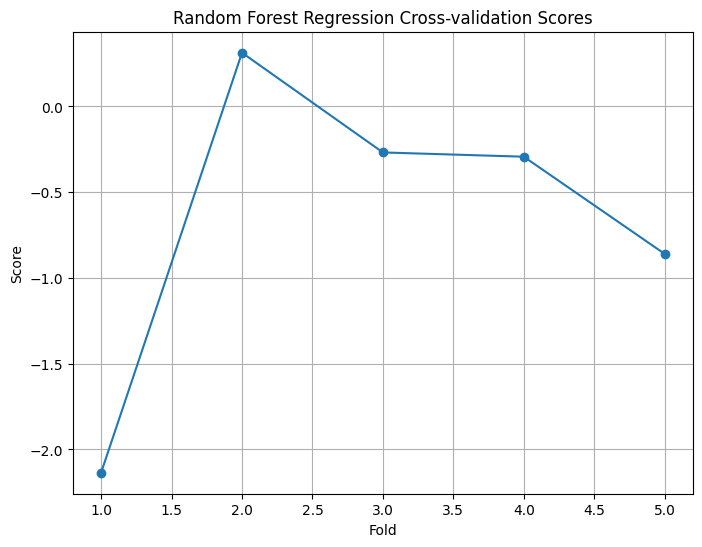

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest Regression RMSE:", rmse_rf)

# Perform cross-validation for Random Forest Regression
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Regression Cross-validation scores:", cv_scores_rf)
print("Random Forest Regression Mean CV Score:", cv_scores_rf.mean())

# Plotting cross-validation scores for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores_rf) + 1), cv_scores_rf, marker='o', linestyle='-')
plt.title('Random Forest Regression Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()



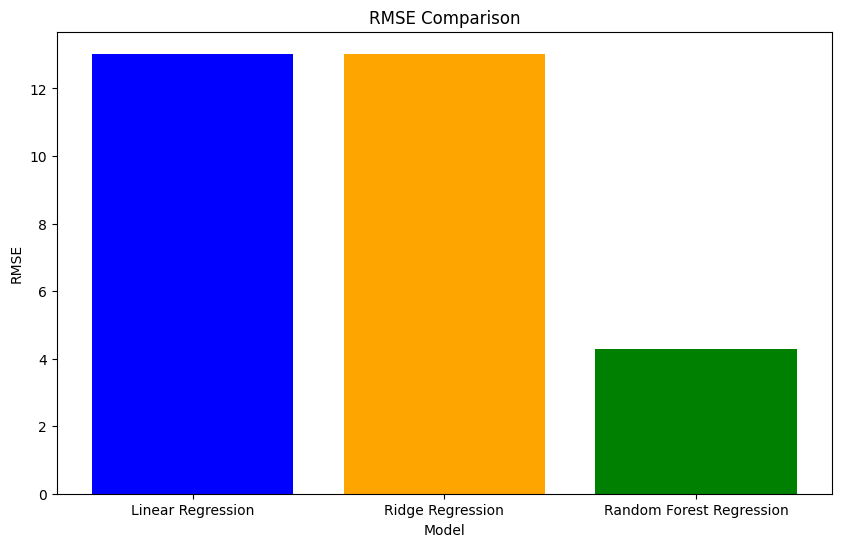

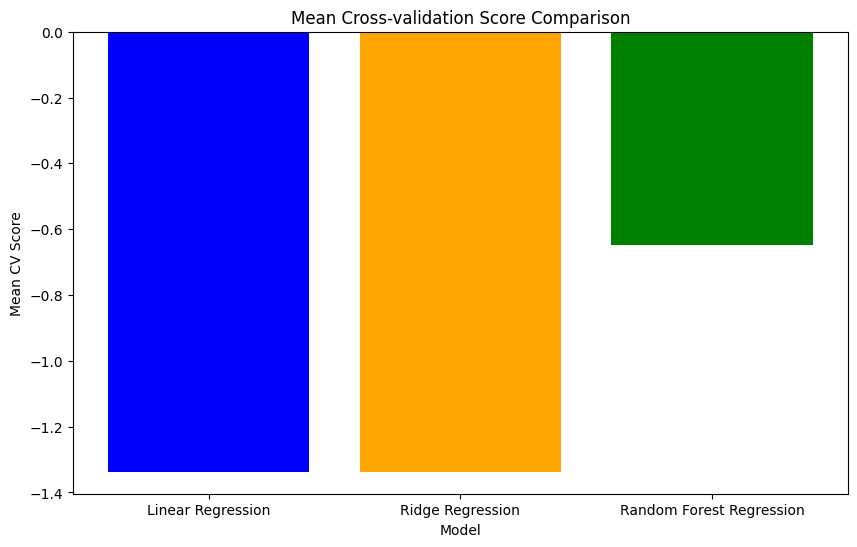

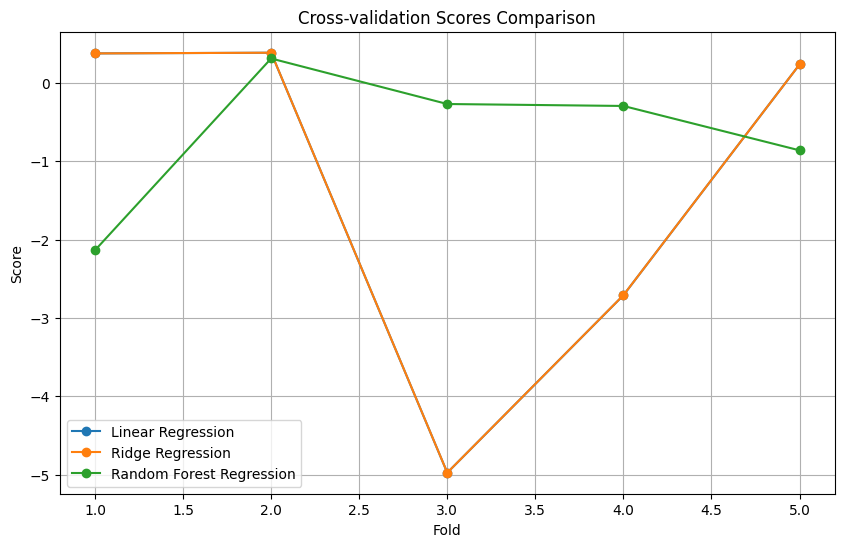

In [ ]:
import matplotlib.pyplot as plt

# Models' names
models = ['Linear Regression', 'Ridge Regression', 'Random Forest Regression']

# RMSE values
rmse_values = [13.028892827572516, 13.028848521127232, 4.284750500995038]

# Cross-validation scores
cv_scores_lr = [0.37825689, 0.38691501, -4.97708114, -2.71078304, 0.23682643]
cv_scores_rr = [0.37822716, 0.38687015, -4.97655342, -2.70966332, 0.23684346]
cv_scores_rf = [-2.13554167, 0.3132829, -0.26812368, -0.29300428, -0.8599032]

# Mean CV scores
mean_cv_scores = [-1.337173171352862, -1.336855196614455, -0.6486579865242325]

# Plotting RMSE values
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Plotting mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(models, mean_cv_scores, color=['blue', 'orange', 'green'])
plt.title('Mean Cross-validation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Mean CV Score')
plt.show()

# Plotting individual cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores_lr) + 1), cv_scores_lr, marker='o', linestyle='-', label='Linear Regression')
plt.plot(range(1, len(cv_scores_rr) + 1), cv_scores_rr, marker='o', linestyle='-', label='Ridge Regression')
plt.plot(range(1, len(cv_scores_rf) + 1), cv_scores_rf, marker='o', linestyle='-', label='Random Forest Regression')
plt.title('Cross-validation Scores Comparison')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


1. RMSE Comparison: The RMSE values provide an indication of how much error the models are making in their predictions. In this case, the Random Forest Regression model has the lowest RMSE, indicating better performance in predicting the number of vehicles.

2. Mean Cross-validation Score Comparison: The mean cross-validation scores provide a summary of the models' performance across different folds. A higher mean cross-validation score indicates better generalization ability. Again, the Random Forest Regression model shows the highest mean cross-validation score, suggesting better performance overall.

3. Individual Cross-validation Scores Comparison: This plot shows the cross-validation scores for each fold separately. It helps visualize the variability in the performance of each model across different subsets of the data. We can see that the Random Forest Regression model generally outperforms the other two models in most folds.


Based on these results, the Random Forest Regression model appears to be the most effective for predicting traffic flow in this scenario. It consistently outperforms both Linear Regression and Ridge Regression in terms of both RMSE and cross-validation scores.